Part 6:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #mounting drive

In [ ]:
pip install lonboard

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer, SolidPolygonLayer

Task 1 - Load Chicago Parcels dataset.

In [7]:
chicago_parcels = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Chicago_parcels.shp') #Loading Chicago parcels dataset using GeoPandas (can't use Pandas as its a raster dataset)

<Axes: >

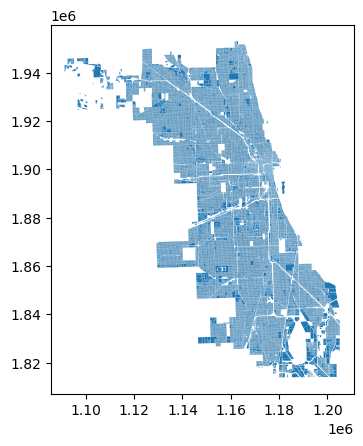

In [8]:
chicago_parcels.plot() #plotting to explore data

Task 2 - Display first few rows of dataset. Investigate atributes and their data types.

In [ ]:
chicago_parcels.head() #displaying first 5 rows

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  
4  POLYGON ((1091970.533 1942338.191, 1091929.082...

In [ ]:
chicago_parcels.dtypes #data types of dataset

POLY_ID        int32
ID             int64
AREA         float64
PIN_OLD        int64
PIN            int64
geometry    geometry
dtype: object

Task 3 - Create Map to visualise spatial distribution of tax parcel polygons.

In [ ]:
tax_parcel = gpd.GeoDataFrame(chicago_parcels, geometry = chicago_parcels.geometry) #converting into GeoDataFrame
tax_parcel.head()

In [ ]:
tax_parcel.total_bounds #showing min and max coordinates

In [15]:
layer = SolidPolygonLayer.from_geopandas(tax_parcel, get_fill_color=[255,0,0]) #map visualising spatial distribution
map = Map(layers=[layer], _height=500)
map

/usr/local/lib/python3.10/dist-packages/lonboard/_geoarrow/ops/reproject.py:107: UserWarning: Input being reprojected to EPSG:4326 CRS.
Lonboard is only able to render data in EPSG:4326 projection.
  warnings.warn(


Map(custom_attribution='', layers=(SolidPolygonLayer(get_fill_color=[255, 0, 0], table=arro3.core.Table
------…

Task  - Correlation Analysis between spatial and numerical attributes.

In [10]:
tax_parcel['centroid_y'] = tax_parcel.geometry.centroid.y #splitting latitude from geometry

In [11]:
tax_parcel['centroid_x'] = tax_parcel.geometry.centroid.x #splitting longitude from geometry

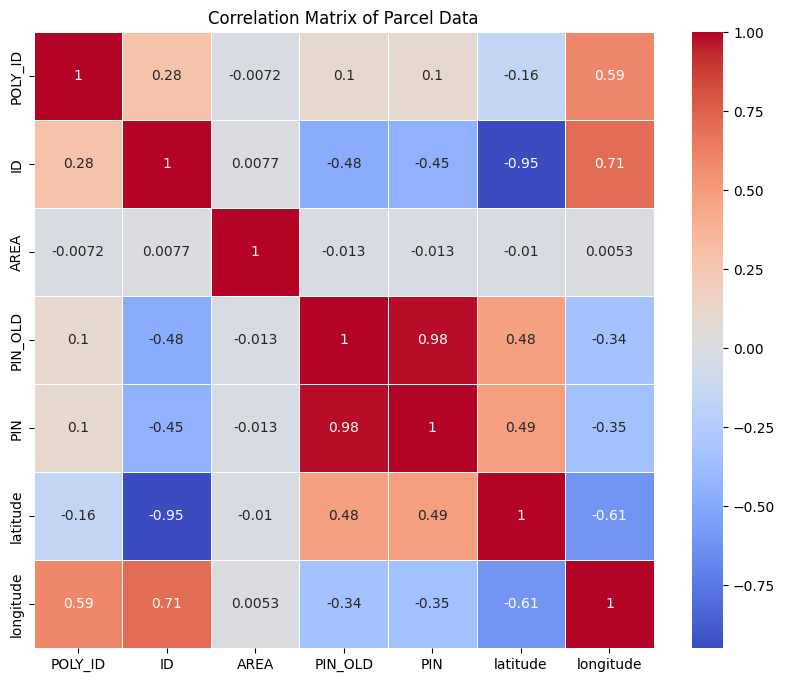

In [ ]:
correlation_matrix = tax_parcel.corr(numeric_only=True) #correlation matrix to better understand patterns in dataset
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Parcel Data')
plt.show()

There is alow correlation between AREA and other variables. High correlation between ID and latitude so it is likely that ID is based on latitude, and also reasonably high with longitude to likely based on both. High correlation between PIN and PIN_OLD so likely PIN_OLD dictated PIN.

Task 5 - K-Means Clustering implementation.

In [ ]:
tax_parcel.head()

In [2]:
def run_kmeans(n_clusters, cmap):   # Implement K-means clustering

  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  tax_parcel['kmeans_cluster'] = kmeans.fit_predict(tax_parcel[['centroid_x', 'centroid_y', 'AREA']])

  tax_parcel.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap=cmap) #Visualises Result

  centroids = kmeans.cluster_centers_ #Plots the x in the centroid
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="x",
      s=169,
      linewidths=3,
      color="b",
      zorder=10,
  )
  plt.title('K-means Clustering Result')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.show()

Task 6 - Visualise clustering results with different n_cluster values with customised colour ramps.

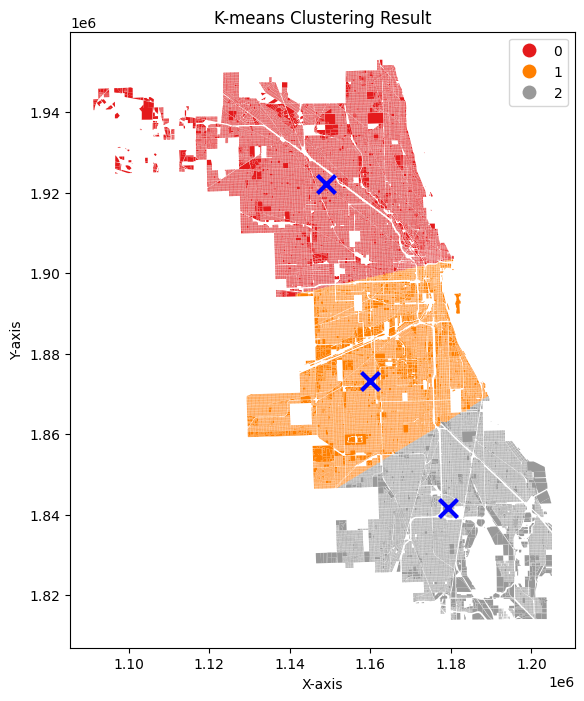

In [12]:
run_kmeans(n_clusters=3, cmap='Set1') #3 n_clusters and Set1 coulour ramp

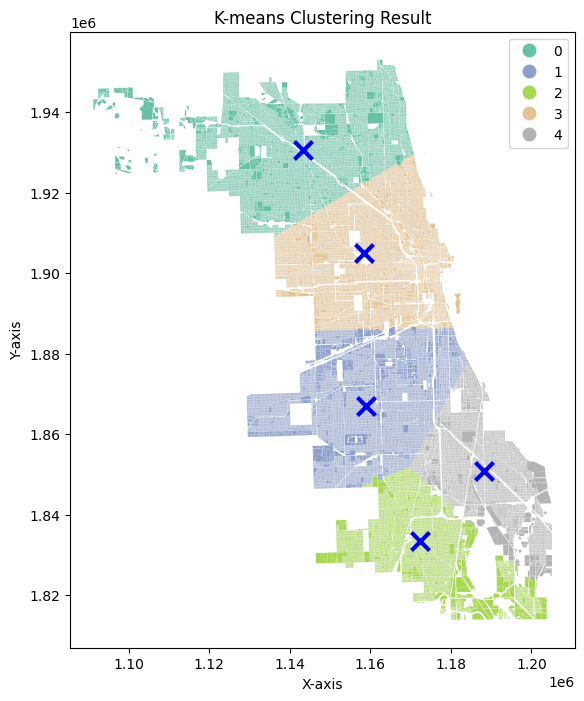

In [13]:
run_kmeans(n_clusters=5, cmap='Set2') #5 n_clusters and Set2 coulour ramp

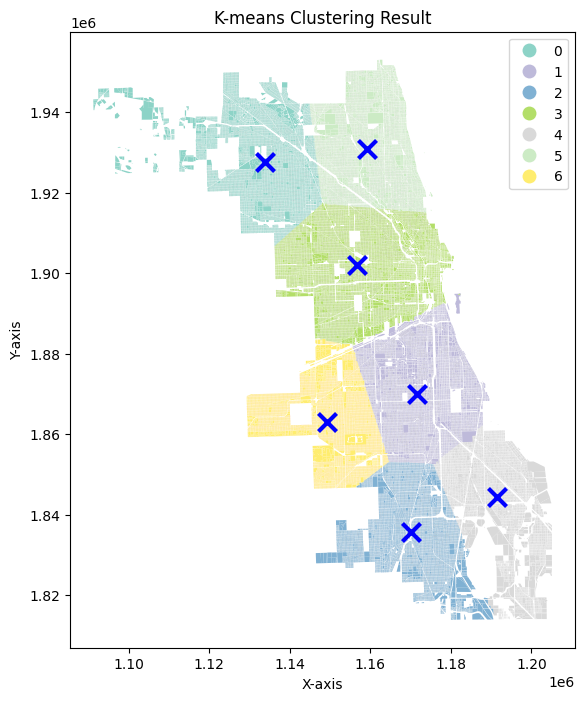

In [14]:
run_kmeans(n_clusters=7, cmap='Set3') #7 n_clusters and Set3 coulour ramp

Task 7 - Evaluate clustering results.

Based on the visualisation within Task 6, the choice of 7 n_clusters seems optimal reflecting the distribution of the data and the scale of the city. If we wanted to conduct further analysis into the optimal number of n_clusters, the elbow method is a popular approach. (https://www.statology.org/elbow-method-in-python/)

Task 8 - DBSCAN Clustering Implementation.

In [ ]:
def run_dbscan_(eps, min_samples): # Implementing DBSCAN clustering

  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  tax_parcel['dbscan_cluster'] = dbscan.fit_predict(tax_parcel[['centroid_x', 'centroid_y', 'AREA']])

  tax_parcel.plot(column='dbscan_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1') #Visualises result

  plt.title('DBSCAN Clustering Result')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.show()

In [ ]:
tax_parcel.head()

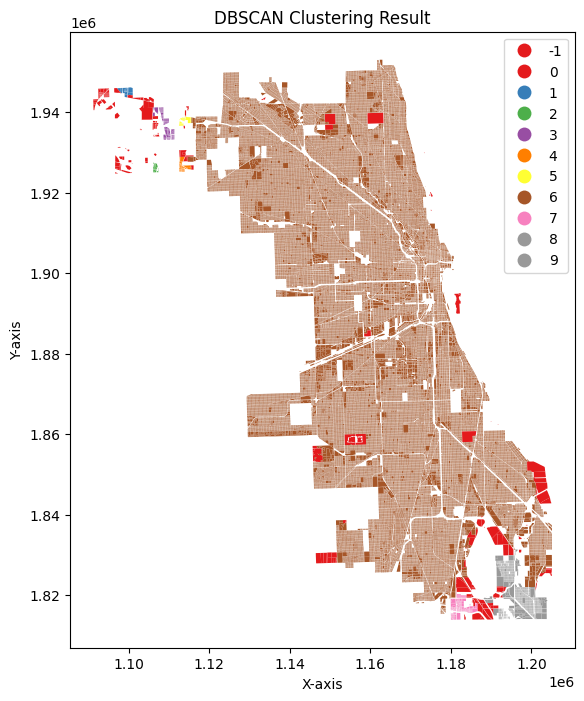

In [ ]:
run_dbscan_(eps=1000, min_samples=10) #epsilon = 1000

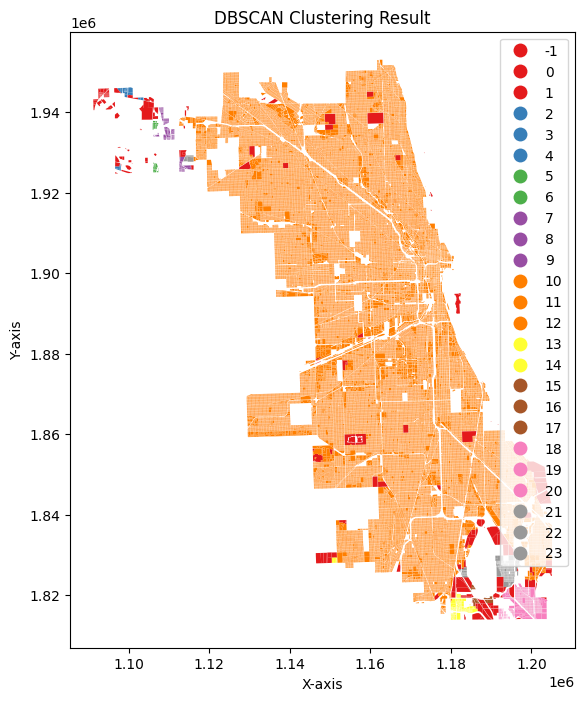

In [ ]:
run_dbscan_(eps=750, min_samples=5) #epsilon = 750

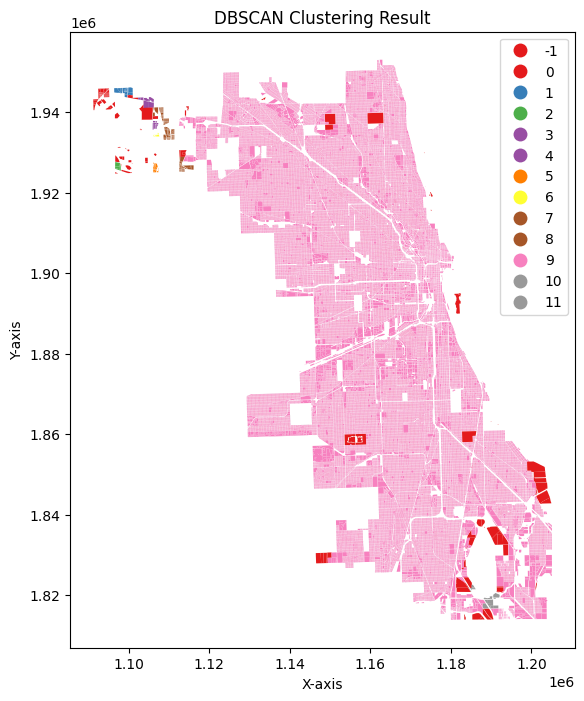

In [ ]:
run_dbscan_(eps=1000, min_samples=5) #epsilon = 1000

Task 9 - Plot clustering results for each combination of parameters creating a plot matrix 3x3.

In [ ]:
def run_dbscan(eps, min_samples, i, j): #takes in 4 arguments

  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  tax_parcel[f'dbscan_cluster_{i}_{j}'] = dbscan.fit_predict(tax_parcel[['centroid_x', 'centroid_y', 'AREA']]) #applies clustering


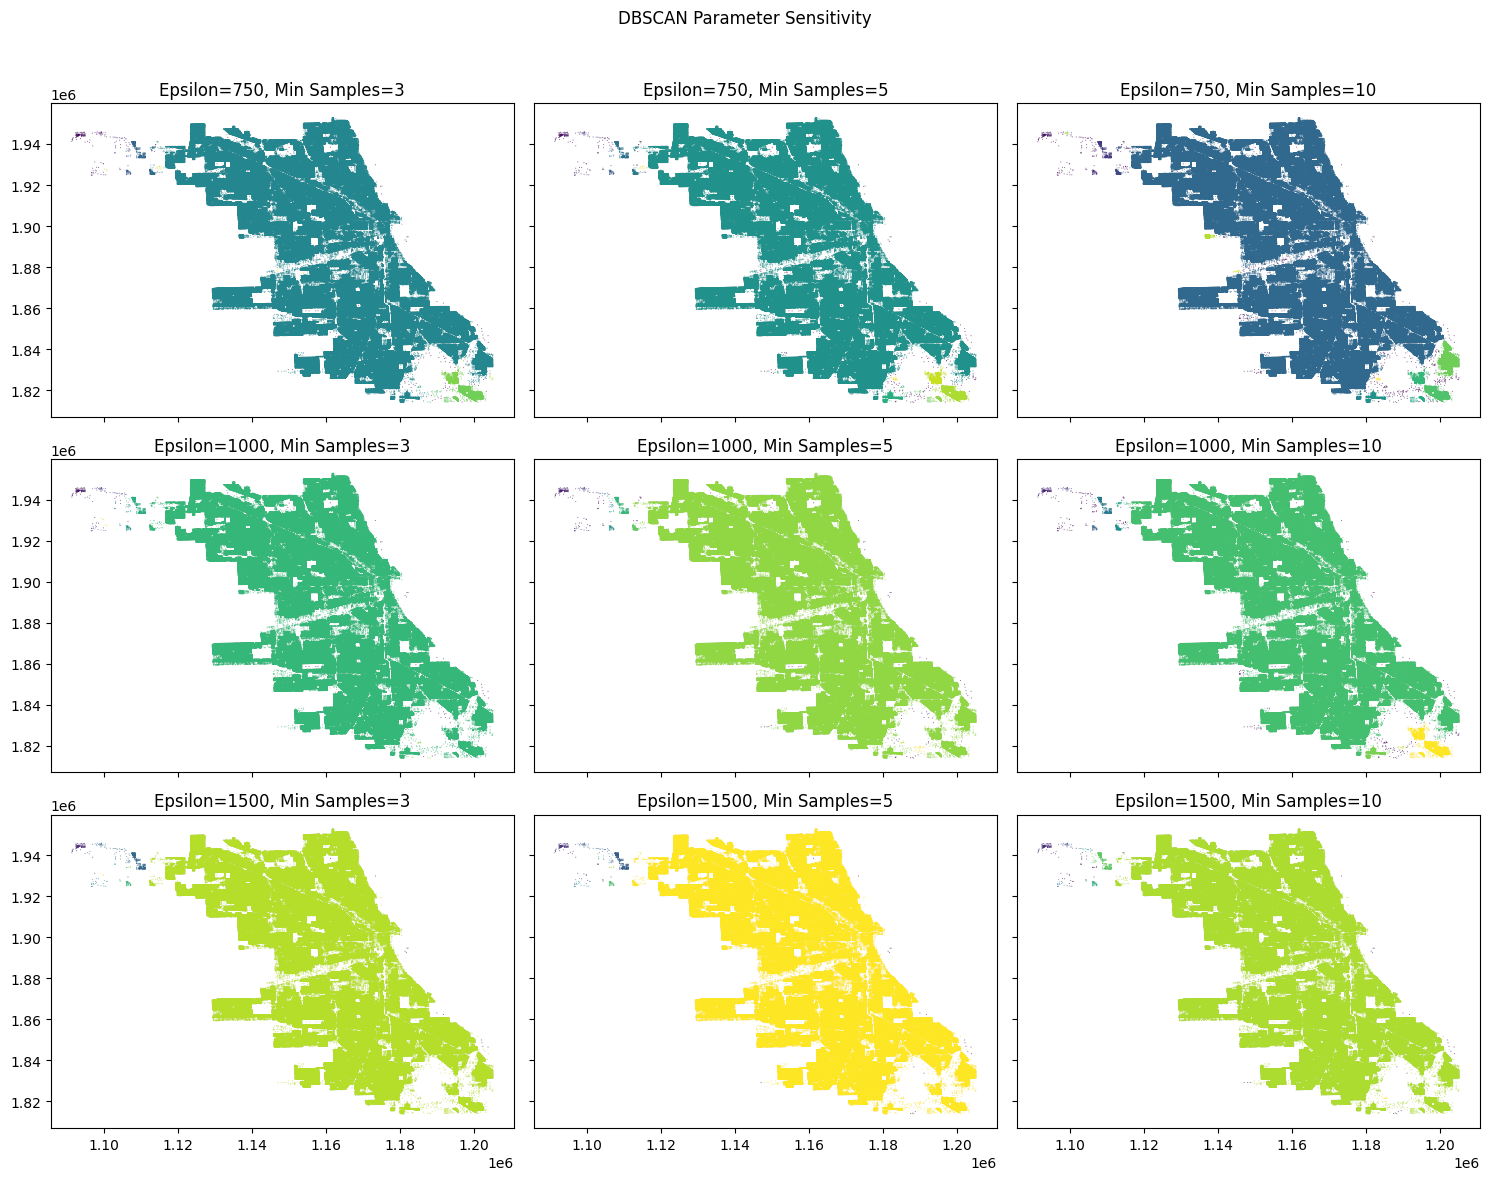

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True, sharey=True) # 3x3 grid to visualise
fig.suptitle('DBSCAN Parameter Sensitivity')

epsilon_values = [750, 1000, 1500] #different epsilon values
sample_values = [3, 5, 10] #different sample_values will combine with above values to create 9 combinations

for i, epsilon in enumerate(epsilon_values): #nested loop
    for j, min_samples in enumerate(sample_values):

        run_dbscan(epsilon, min_samples, i, j)

        axes[i, j].scatter(tax_parcel['centroid_x'], tax_parcel['centroid_y'], c=tax_parcel[f'dbscan_cluster_{i}_{j}'], cmap='viridis', alpha=0.7, s=0.5, linewidths=0.002)
        axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Task 10 - Insights into modifying eps and min_sample.

Had to raise the Epsilon much higher than expected to get multiple clusters. Based on Task 9, a value of 1000 for Epsilon seems like a nice balance to provide meaningful clusters without being to fragmented. Minimum smaples of 5 again seems like a nice balance providinng clusters that are a good size for interpretation and avoid too much noise.